In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

In [2]:
data=pd.read_csv('/content/Wind prediction Dataset.csv')

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.style as style
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

In [4]:
data.shape

(50530, 5)

In [5]:
data.describe()

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
count,50530.000000,50530.000000,50530.000000,50530.000000
mean,1307.684332,7.557952,1492.175463,123.687559
std,1312.459242,4.227166,1368.018238,93.443736
min,-2.471405,0.000000,0.000000,0.000000
25%,50.677890,4.201395,161.328167,49.315437
50%,825.838074,7.104594,1063.776283,73.712978
75%,2482.507568,10.300020,2964.972462,201.696720
max,3618.732910,25.206011,3600.000000,359.997589


In [6]:
data.isnull().sum()

Date/Time                        0
LV ActivePower (kW)              0
Wind Speed (m/s)                 0
Theoretical_Power_Curve (KWh)    0
Wind Direction (°)               0
dtype: int64

In [8]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/Wind prediction Dataset.csv')

# Convert 'Date/Time' to datetime, coercing errors to NaT
data['Date/Time'] = pd.to_datetime(data['Date/Time'], format='%d %m %Y %H:%M', errors='coerce')

# Check for any NaT values and consider dropping them if necessary
if data['Date/Time'].isna().sum() > 0:
    print(f"Number of unparseable dates: {data['Date/Time'].isna().sum()}")
    data = data.dropna(subset=['Date/Time'])

# Set the 'Date/Time' column as the index of the dataframe
data.set_index('Date/Time', inplace=True)

# Check for any remaining missing values and fill or drop them
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)
data = data.fillna(data.mean())  # Filling missing values with the mean of each column

# Resample the data to get average power production per month
monthly_avg_power = data['LV ActivePower (kW)'].resample('M').mean()


Missing values in each column:
 LV ActivePower (kW)              0
Wind Speed (m/s)                 0
Theoretical_Power_Curve (KWh)    0
Wind Direction (°)               0
dtype: int64


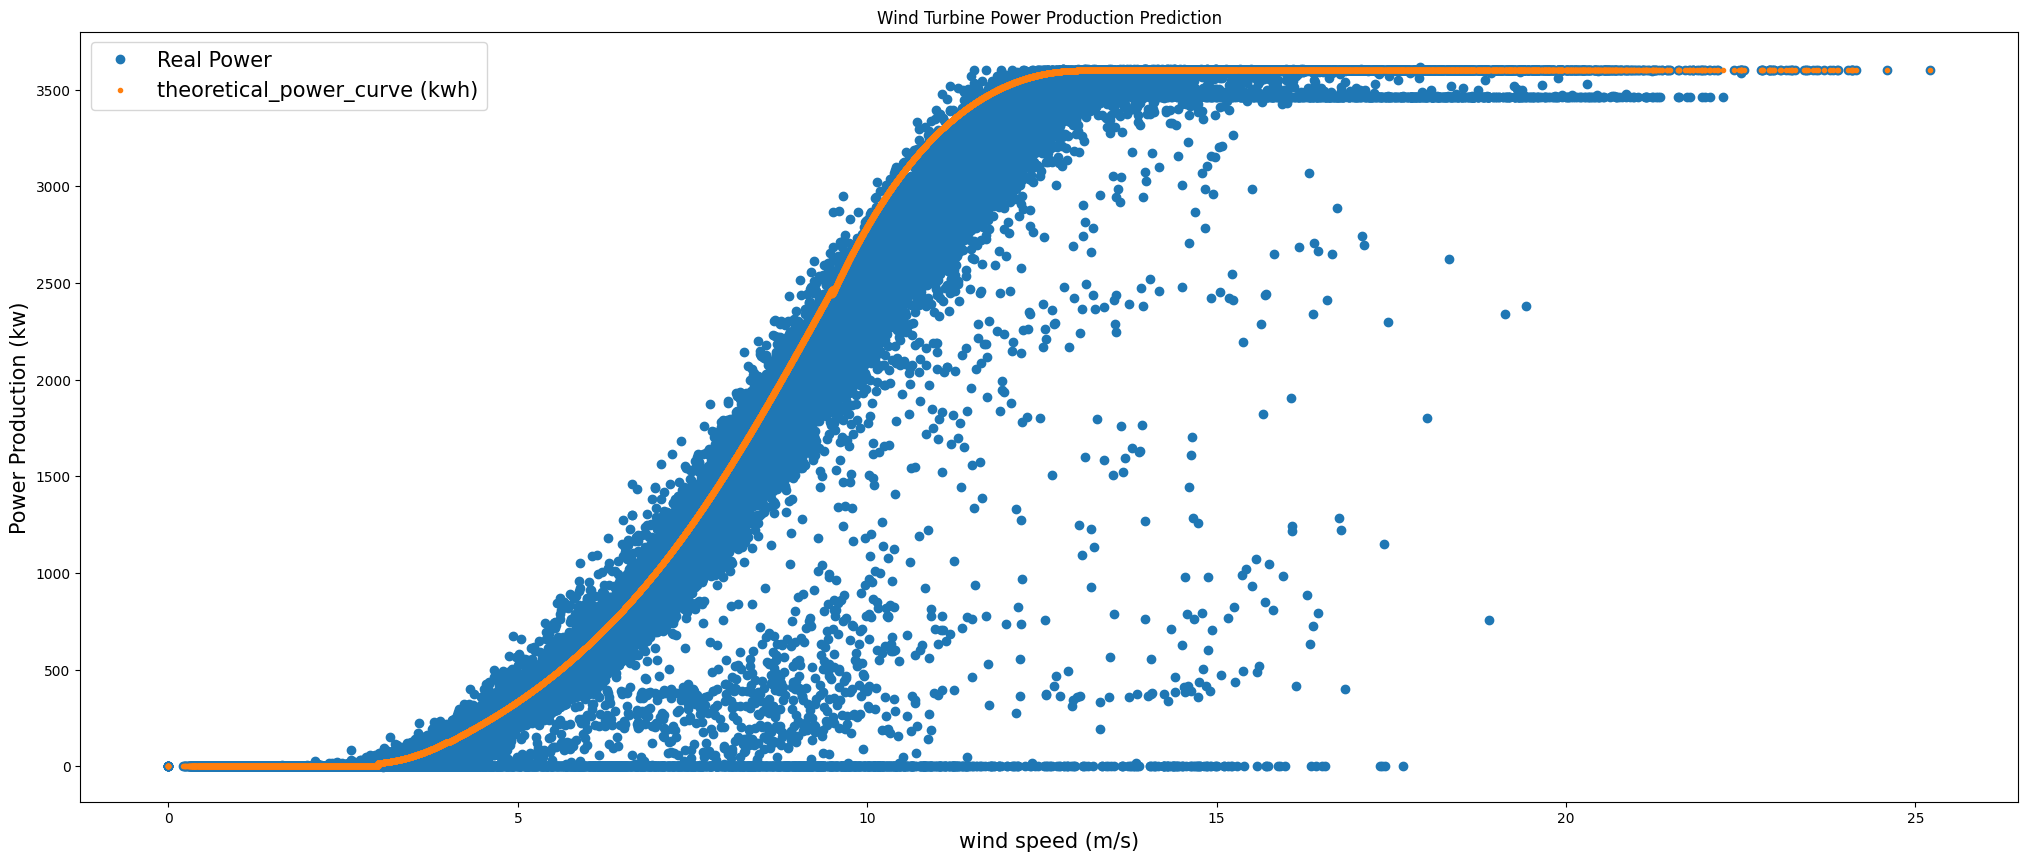

In [9]:
data = data
exp = data['LV ActivePower (kW)']
the = data['Theoretical_Power_Curve (KWh)']
plt.figure(figsize=(25,10))
plt.plot(data['Wind Speed (m/s)'], data['LV ActivePower (kW)'], 'o', label='Real Power')
plt.plot(data['Wind Speed (m/s)'], data['Theoretical_Power_Curve (KWh)'], '.', label='theoretical_power_curve (kwh)')
plt.xlabel('wind speed (m/s)', size=15)
plt.ylabel('Power Production (kw)', size=15)
plt.title('Wind Turbine Power Production Prediction')
plt.legend(fontsize=15)
plt.show()

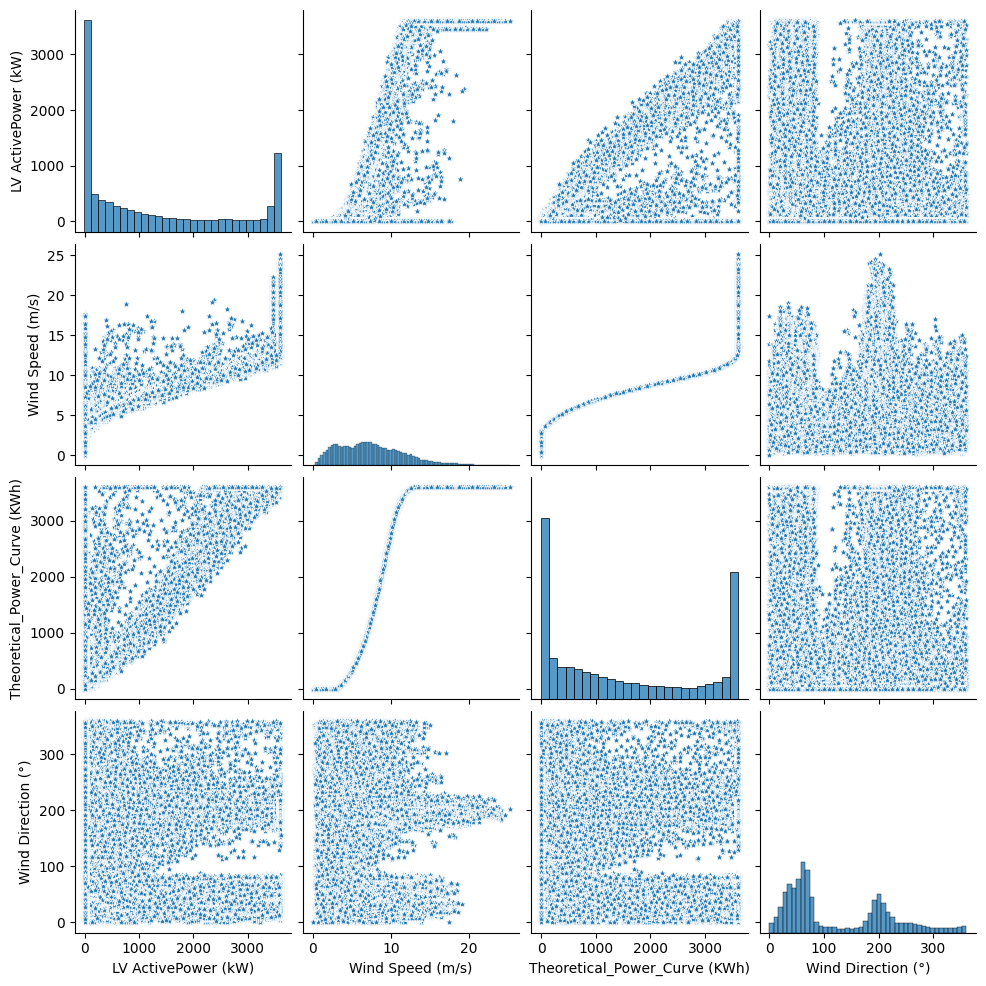

In [10]:
import seaborn as sns
sns.pairplot(data, markers='*')

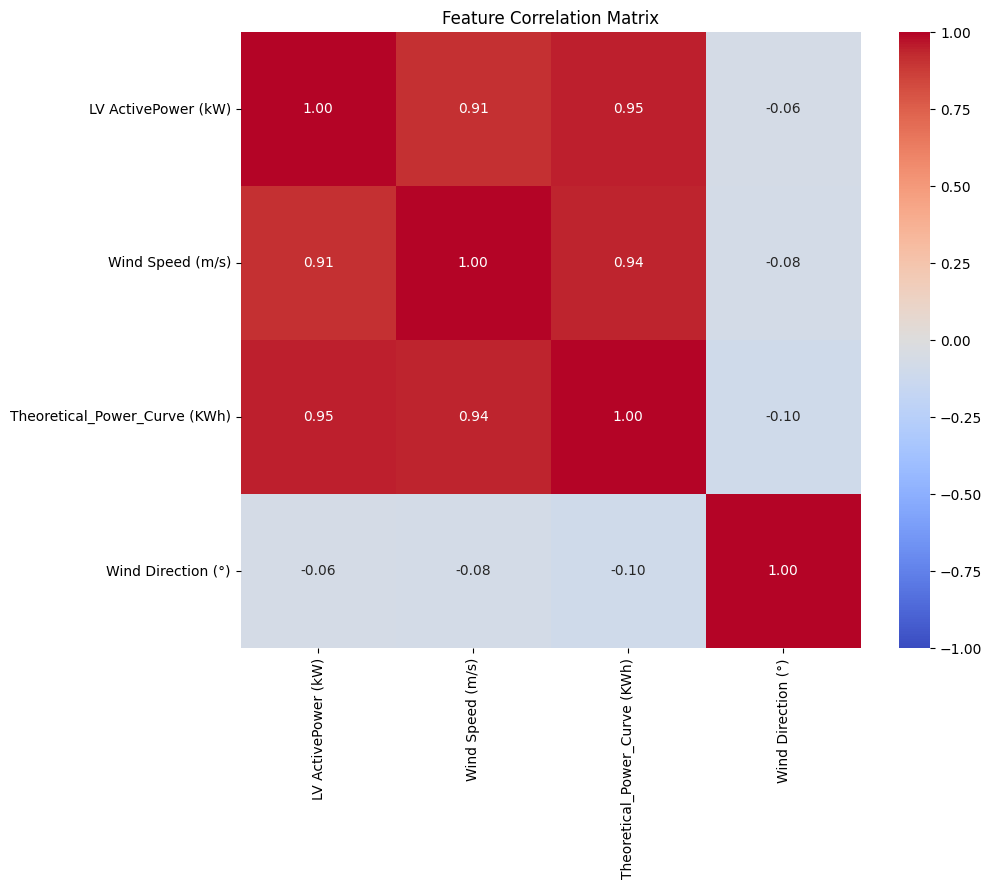

In [11]:

plt.figure(figsize=(10, 8))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Feature Correlation Matrix')
plt.show()


In [12]:
y = data['LV ActivePower (kW)']
X = data[['Theoretical_Power_Curve (KWh)', 'Wind Speed (m/s)']]

# Split the dataset into training and validation sets
train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.2, random_state=0)  # Added test_size for clarity


In [13]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import numpy as np

# Assume train_X, train_y, val_X, val_y are already defined

# Initialize the scaler
scaler = MinMaxScaler()

# Reshape train_y and val_y for scaling (convert to numpy array and reshape)
train_y_scaled = scaler.fit_transform(train_y.to_numpy().reshape(-1, 1))
val_y_scaled = scaler.transform(val_y.to_numpy().reshape(-1, 1))

# Initialize and train Linear Regression model
linear_model = LinearRegression()
linear_model.fit(train_X, train_y_scaled.ravel())

# Initialize and train Decision Tree model
tree_model = DecisionTreeRegressor(random_state=0)
tree_model.fit(train_X, train_y_scaled.ravel())

# Initialize and train Random Forest model
forest_model = RandomForestRegressor(max_leaf_nodes=500, random_state=1)
forest_model.fit(train_X, train_y_scaled.ravel())

# Predict and calculate MAE, R², and RMSE on the scaled validation set
models = [linear_model, tree_model, forest_model]
names = ['Linear Regression', 'Decision Tree', 'Random Forest']

for model, name in zip(models, names):
    val_predictions_scaled = model.predict(val_X)
    mae_scaled = mean_absolute_error(val_y_scaled, val_predictions_scaled)
    r2_scaled = r2_score(val_y_scaled, val_predictions_scaled)
    rmse_scaled = np.sqrt(mean_squared_error(val_y_scaled, val_predictions_scaled))

    print(f"{name}: Scaled MAE = {mae_scaled:.2f}, R² = {r2_scaled:.2f}, RMSE = {rmse_scaled:.2f}")


Linear Regression: Scaled MAE = 0.05, R² = 0.91, RMSE = 0.11
Decision Tree: Scaled MAE = 0.06, R² = 0.82, RMSE = 0.15
Random Forest: Scaled MAE = 0.05, R² = 0.90, RMSE = 0.11


In [14]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Assume train_X, train_y, val_X, val_y are already defined

# Initialize the scaler
scaler = MinMaxScaler()

# Reshape train_y and val_y for scaling (convert to numpy array and reshape)
train_y_scaled = scaler.fit_transform(train_y.to_numpy().reshape(-1, 1))
val_y_scaled = scaler.transform(val_y.to_numpy().reshape(-1, 1))

# Initialize and train Linear Regression model
linear_model = LinearRegression()
linear_model.fit(train_X, train_y_scaled.ravel())  # Flatten the array with ravel()

# Initialize and train Decision Tree model
tree_model = DecisionTreeRegressor(random_state=0)
tree_model.fit(train_X, train_y_scaled.ravel())

# Initialize and train Random Forest model
forest_model = RandomForestRegressor(max_leaf_nodes=500, random_state=1)
forest_model.fit(train_X, train_y_scaled.ravel())

# Predict and calculate MAE on the scaled validation set
models = [linear_model, tree_model, forest_model]
names = ['Linear Regression', 'Decision Tree', 'Random Forest']

for model, name in zip(models, names):
    val_predictions_scaled = model.predict(val_X)
    mae_scaled = mean_absolute_error(val_y_scaled, val_predictions_scaled)
    print(f"{name}: Scaled MAE = {mae_scaled:.2f}")


Linear Regression: Scaled MAE = 0.05
Decision Tree: Scaled MAE = 0.06
Random Forest: Scaled MAE = 0.05


In [15]:
linear_model = LinearRegression()
linear_model.fit(train_X, train_y)

# Initialize and train Decision Tree model
tree_model = DecisionTreeRegressor(random_state=0)
tree_model.fit(train_X, train_y)

# Initialize and train Random Forest model
forest_model = RandomForestRegressor(max_leaf_nodes=500, random_state=1)
forest_model.fit(train_X, train_y)


RandomForestRegressor(max_leaf_nodes=500, random_state=1)

In [16]:
models = [linear_model, tree_model, forest_model]
names = ['Linear Regression', 'Decision Tree', 'Random Forest']

for model, name in zip(models, names):
    val_predictions = model.predict(val_X)
    mae = mean_absolute_error(val_y, val_predictions)
    mae=mae
    r2 = r2_score(val_y, val_predictions)
    print(f"{name}: MAE = {mae:.2f}, R^2 = {r2:.2f}")

Linear Regression: MAE = 185.87, R^2 = 0.91
Decision Tree: MAE = 222.31, R^2 = 0.82
Random Forest: MAE = 163.09, R^2 = 0.90


                        Features  Importance
1               Wind Speed (m/s)    0.508573
0  Theoretical_Power_Curve (KWh)    0.491427


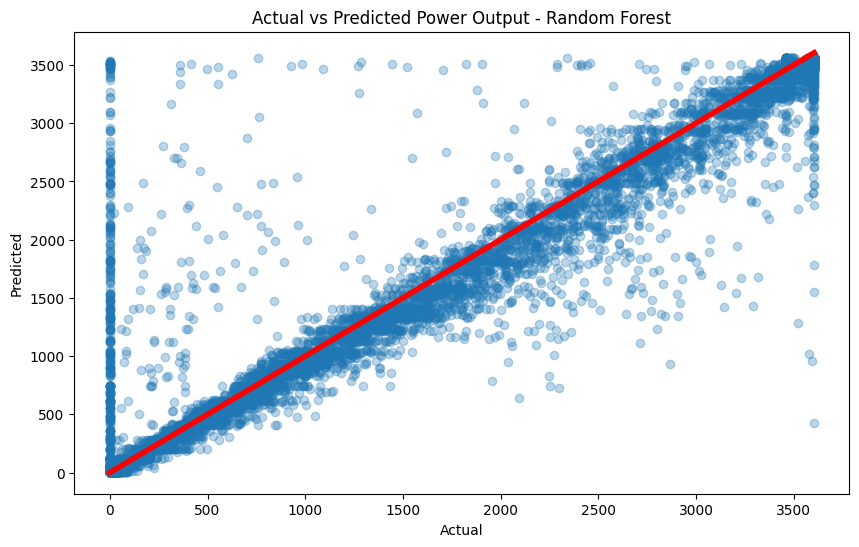

In [17]:
feature_importances = forest_model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Features': features, 'Importance': feature_importances})
print(importance_df.sort_values(by='Importance', ascending=False))

# Plot actual vs predicted values for Random Forest model
val_predictions_rf = forest_model.predict(val_X)
plt.figure(figsize=(10, 6))
plt.scatter(val_y, val_predictions_rf, alpha=0.3)
plt.plot([val_y.min(), val_y.max()], [val_y.min(), val_y.max()], 'r', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Power Output - Random Forest')
plt.show()

                        Features  Importance
1               Wind Speed (m/s)    0.810889
0  Theoretical_Power_Curve (KWh)    0.189111


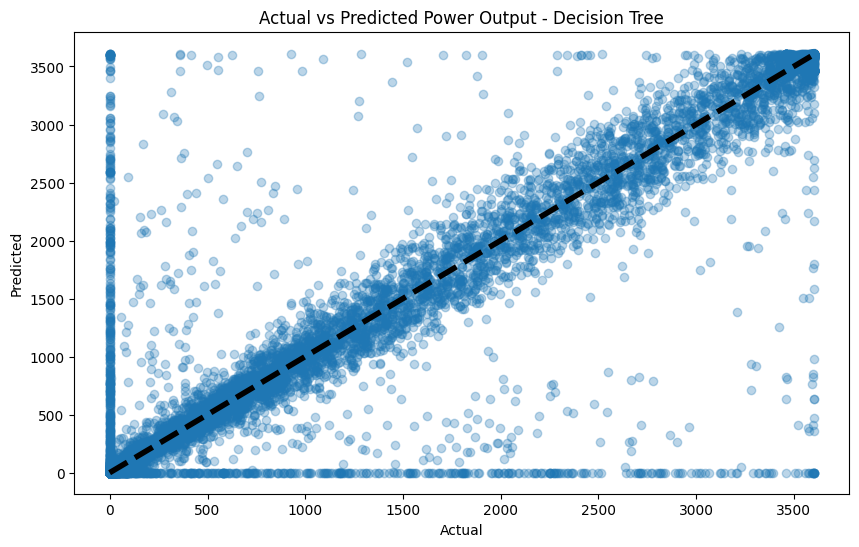

In [18]:

feature_importances = tree_model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Features': features, 'Importance': feature_importances})
print(importance_df.sort_values(by='Importance', ascending=False))

# Plot actual vs predicted values for Decision Tree model
val_predictions_dt = tree_model.predict(val_X)
plt.figure(figsize=(10, 6))
plt.scatter(val_y, val_predictions_dt, alpha=0.3)
plt.plot([val_y.min(), val_y.max()], [val_y.min(), val_y.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Power Output - Decision Tree')
plt.show()

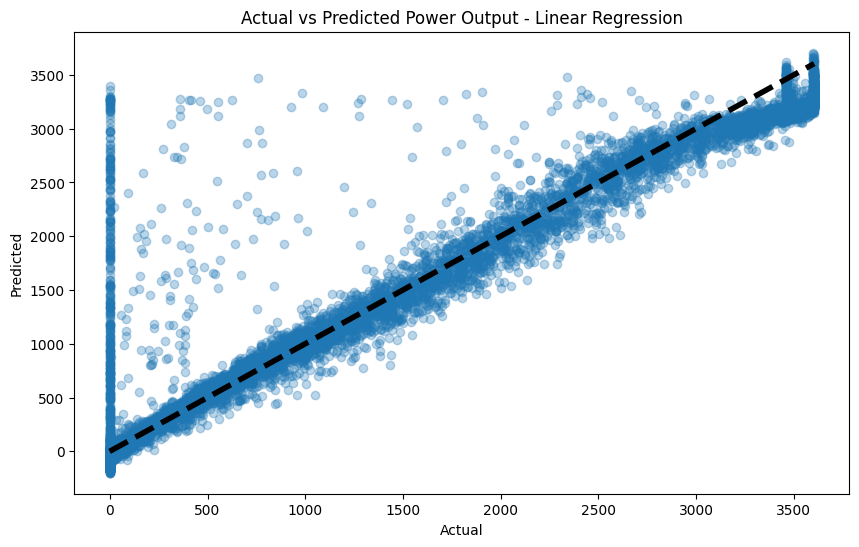

                         Feature  Coefficient
1               Wind Speed (m/s)    46.062267
0  Theoretical_Power_Curve (KWh)     0.776772


In [19]:
val_predictions_lr = linear_model.predict(val_X)
plt.figure(figsize=(10, 6))
plt.scatter(val_y, val_predictions_lr, alpha=0.3)
plt.plot([val_y.min(), val_y.max()], [val_y.min(), val_y.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Power Output - Linear Regression')
plt.show()

# Optionally print the coefficients
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': linear_model.coef_})
print(coefficients.sort_values(by='Coefficient', ascending=False))

In [20]:
new_data_example = {
    'Theoretical_Power_Curve (KWh)': [200],  # replace with actual theoretical power in KWh
    'Wind Speed (m/s)': [5]  # replace with actual wind speed in m/s, note the space between 'Wind' and 'Speed'
}

# Convert the new data to a DataFrame
new_data_df = pd.DataFrame(new_data_example)

# Use the trained Random Forest model to predict the output energy
predicted_output_energy = forest_model.predict(new_data_df)

# Display the prediction
print("Predicted Output Energy (kW):", predicted_output_energy[0])

Predicted Output Energy (kW): 224.39667694720484
